In [ ]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline
from tqdm import tqdm
import glob
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress

In [2]:
files = glob.glob('../BL_Work/openPrescribe/savings_Impact/*.h5')
files.sort()
print files

['../BL_Work/openPrescribe/savings_Impact/201406.h5', '../BL_Work/openPrescribe/savings_Impact/201407.h5', '../BL_Work/openPrescribe/savings_Impact/201408.h5', '../BL_Work/openPrescribe/savings_Impact/201409.h5', '../BL_Work/openPrescribe/savings_Impact/201410.h5', '../BL_Work/openPrescribe/savings_Impact/201411.h5', '../BL_Work/openPrescribe/savings_Impact/201412.h5', '../BL_Work/openPrescribe/savings_Impact/201501.h5', '../BL_Work/openPrescribe/savings_Impact/201502.h5', '../BL_Work/openPrescribe/savings_Impact/201503.h5', '../BL_Work/openPrescribe/savings_Impact/201504.h5', '../BL_Work/openPrescribe/savings_Impact/201505.h5', '../BL_Work/openPrescribe/savings_Impact/201506.h5', '../BL_Work/openPrescribe/savings_Impact/201507.h5', '../BL_Work/openPrescribe/savings_Impact/201508.h5', '../BL_Work/openPrescribe/savings_Impact/201509.h5', '../BL_Work/openPrescribe/savings_Impact/201510.h5', '../BL_Work/openPrescribe/savings_Impact/201511.h5', '../BL_Work/openPrescribe/savings_Impact/2015

In [6]:
files[20]

'../BL_Work/openPrescribe/savings_Impact/201602.h5'

In [8]:
pdp = pd.read_hdf('../BL_Work/openPrescribe/savings_Impact/201601.h5',compression='gzip')
pdp.dropna()
for month in [ '201602' , '201603']:
    file_path  = '../BL_Work/openPrescribe/savings_Impact/' + month + '.h5'
#     pdp2 = pd.read_csv(file_path,compression='gzip')
    pdp2 = pd.read_hdf(file_path,compression='gzip')
    pdp2.dropna()
    pdp.append(pdp2)

In [9]:
pdp.head()

Unnamed: 0    0    1       2                3  \
0 51135        59964  Q44  01R  N81084  0101010C0BBAAAA   
  55454        64283  Q44  01R  N81614  0101010C0AAAAAA   
  69323        78846  Q44  02D  N81087  0101010C0AAAAAA   
  81064        91133  Q44  02E  N81020  0101010C0AAAAAA   
  104971      115040  Q44  02E  N81122  0101010C0BBAAAA   

                                                 4    5      6      7      8  \
0 51135   Alu-Cap_Cap 475mg                         1.0  38.39  35.57  336.0   
  55454   Alum Hydrox_Cap 475mg                     1.0  13.71  12.66  120.0   
  69323   Alum Hydrox_Cap 475mg                     1.0  31.99  29.66  280.0   
  81064   Alum Hydrox_Cap 475mg                     2.0  25.60  23.86  224.0   
  104971  Alu-Cap_Cap 475mg                         1.0  19.19  17.84  168.0   

          ...     15         16          17   18          19  20        21  \
0 51135   ...  475.0  0101010C0  112.000000  1.0  112.000000  BB  0.110952   
  55454   ...  475.0  0101010C0   40.000000  1.0   40.000000  AA  0.110952   
  69323   ...  475.0  0101010C0   93.333333  1.0   93.333333  AA  0.110952   
  81064   ...  475.0  0101010C0   74.666667  1.0   74.666667  AA  0.110952   
  104971  ...  475.0  0101010C0   56.000000  1.0   56.000000  BB  0.110952   

                22         23        24  
0 51135   0.143333  10.880000  1.413690  
  55454   0.143333   3.885714  3.958333  
  69323   0.143333   9.066667  1.696429  
  81064   0.143333   7.253333  2.120536  
  104971  0.143333   5.440000  2.827381  

[5 rows x 26 columns]

In [ ]:
# fentanyl = pdp[pdp['16'].str.contains('0309010C0')]
# # fentanyl[fentanyl['20'] != 'AA']
# fentanyl

In [10]:
%store -r opiod_BNF
# %store -r antiDep_BNF

In [ ]:
# opiod_BNF = antiDep_BNF
# opiod_BNF

In [11]:
LSOA_dist = json.load(open('scratchpad/GP_LSOA_PATIENTSDIST.json','rb'))

In [12]:
opiod_BNF.head()

,Unnamed: 0,BNF_code,NAME,UNII_drugbank
88,88,0104020D0,Codeine Phosphate Compound Mixtures ...,UX6OWY2V7J
90,90,0104020L0,Loperamide Hydrochloride ...,6X9OC3H4II
91,91,0104020N0,Opium & Morphine ...,76I7G6D29C
92,92,0104020P0,Loperamide Hydrochloride & Simeticone ...,6X9OC3H4II
154,154,0106060A0,Methylnaltrexone Bromide ...,0RK7M7IABE


In [13]:
ward_pop = pd.read_csv('scratchpad/ward_pop.csv')

/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
GP_META = pd.read_csv('../BL_Work/epraccur.csv',header=None)
GP_META.rename(columns={0:'BP_code',
                        1:'Name',
                        2:'Grouping',
                        3:'National_geo',
                        4:'Addr1',
                        5:'Addr2',
                        6:'Addr3',
                        7: 'Addr4',
                        8:'Addr5',
                        9:'Postcode',
                        10:'Open',
                        11:'Closed',
                        12:'Status',
                        13:'Org type code',
                        14:'Commissioner',
                        15:'Join provider',
                        16:'Left provider',
                        17:'Contact',
                        18:'Null1',
                        19:'Null2',
                        20:'Null3',
                        21:'Amended',
                        22:'Null4',
                        23:'Provider',
                        24:'Null5',
                        25:'Setting',
                        26:'Null6'}, 
                 inplace=True)

In [15]:
Open_filtered_GPs = {}
for index,row in GP_META.iterrows():
    if row ['Setting'] == 4 and row['Status'] =='A':
        Open_filtered_GPs[row['BP_code']] = row['Postcode'].strip()

In [16]:
population = {}
for index, row in ward_pop.iterrows():
    population[row['Ward Code 1']] = float(row['All Ages'].replace(',',''))

In [17]:
population_borough = {}
for name,group in ward_pop.groupby('Local Authority'):
    population_borough[name] = 0.0
    for index , row in group.iterrows():
        population_borough[name] += float(row['All Ages'].replace(',',''))

In [18]:
pdp.head()

Unnamed: 0    0    1       2                3  \
0 51135        59964  Q44  01R  N81084  0101010C0BBAAAA   
  55454        64283  Q44  01R  N81614  0101010C0AAAAAA   
  69323        78846  Q44  02D  N81087  0101010C0AAAAAA   
  81064        91133  Q44  02E  N81020  0101010C0AAAAAA   
  104971      115040  Q44  02E  N81122  0101010C0BBAAAA   

                                                 4    5      6      7      8  \
0 51135   Alu-Cap_Cap 475mg                         1.0  38.39  35.57  336.0   
  55454   Alum Hydrox_Cap 475mg                     1.0  13.71  12.66  120.0   
  69323   Alum Hydrox_Cap 475mg                     1.0  31.99  29.66  280.0   
  81064   Alum Hydrox_Cap 475mg                     2.0  25.60  23.86  224.0   
  104971  Alu-Cap_Cap 475mg                         1.0  19.19  17.84  168.0   

          ...     15         16          17   18          19  20        21  \
0 51135   ...  475.0  0101010C0  112.000000  1.0  112.000000  BB  0.110952   
  55454   ...  475.0  0101010C0   40.000000  1.0   40.000000  AA  0.110952   
  69323   ...  475.0  0101010C0   93.333333  1.0   93.333333  AA  0.110952   
  81064   ...  475.0  0101010C0   74.666667  1.0   74.666667  AA  0.110952   
  104971  ...  475.0  0101010C0   56.000000  1.0   56.000000  BB  0.110952   

                22         23        24  
0 51135   0.143333  10.880000  1.413690  
  55454   0.143333   3.885714  3.958333  
  69323   0.143333   9.066667  1.696429  
  81064   0.143333   7.253333  2.120536  
  104971  0.143333   5.440000  2.827381  

[5 rows x 26 columns]

In [19]:
# rantadine = pdp.loc[pdp['16'] == '0103010T0']

In [20]:
# rantadine[rantadine['15']==150]

In [21]:
opioids = pdp.loc[pdp['16'].isin(opiod_BNF['BNF_code'])]

In [22]:
non_generic_opioid = opioids.loc[opioids['20']!='AA']

In [23]:
sum(non_generic_opioid['23'])

1295850.2444601387

In [24]:
sum(opioids['7'])

23327896.790001158

In [25]:
len(non_generic_opioid), len(opioids)

(122847, 348397)

In [26]:
GP_postcodes_long = {}
for name , group in non_generic_opioid.groupby('2'):
    postcode = list(set(group['10']))
    GP_postcodes_long[name] = str(postcode[0]).strip()

In [27]:
ward_df = pd.read_csv('../BL_Work/pcd11_par11_wd11_lad11_ew_lu.csv')

# ward_df.head()

ward_postcode_map = {}
for name, group in ward_df.groupby('wd11cd'):
    ward_postcode_map[name] = list(group['pcds'])

/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (5,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
LSOA_savings = {}

for name, group in tqdm(non_generic_opioid.groupby('2')):
    total_saving = np.sum(group['23'])
    if name in LSOA_dist:        
        for k in LSOA_dist[name]:
            if k not in LSOA_savings:
                LSOA_savings[k] = 0.0
            LSOA_savings[k]+= float(total_saving)*float(LSOA_dist[name][k])

100%|██████████| 6791/6791 [00:05<00:00, 1202.01it/s]


In [29]:
%store -r Ward_prevalence
%store -r Ward_patients
%store -r DiseasePop_byWard

In [30]:
df = pd.read_csv('../BL_Work/Lower_Layer_Super_Output_Area_2011_to_Ward_2015_Lookup_in_England_and_Wales.csv')

In [31]:
wardMap = {}
for name , group in df.groupby('WD15CD'):
        wardMap[name] = list(group['LSOA11CD'])

In [32]:
boroughMap = {}
for name , group in df.groupby('LAD15NM'):
        boroughMap[name] = list(group['LSOA11CD'])

In [33]:
population_borough = {}
for name,group in ward_pop.groupby('Local Authority'):
    population_borough[name] = 0.0
    for index , row in group.iterrows():
        population_borough[name] += float(row['All Ages'].replace(',',''))

In [34]:
borough_savings_UK = {}

for k in boroughMap:
    try:
        borough_savings= np.sum([LSOA_savings[w] for w in boroughMap[k] if not np.isnan(LSOA_savings[w])])
        pop = population_borough[k]
        borough_savings_UK[k] = (float(borough_savings)/float(pop))*1000.0
        
    except:
        print "Some ward had wrong data"

Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data
Some ward had wrong data


In [35]:
borough_savings_UK

{'Adur': 10.355326487570414,
 'Allerdale': 10.014627206398508,
 'Amber Valley': 8.132212259237532,
 'Arun': 18.055314315717226,
 'Ashfield': 19.20210167755529,
 'Ashford': 48.20137812092196,
 'Aylesbury Vale': 10.188604011975825,
 'Babergh': 43.79094584851205,
 'Barking and Dagenham': 7.95053402403856,
 'Barnet': 24.76077589432007,
 'Barnsley': 25.29113333456925,
 'Barrow-in-Furness': 19.364952291030733,
 'Basildon': 29.951392785371098,
 'Basingstoke and Deane': 24.538440584375877,
 'Bassetlaw': 27.610751963022672,
 'Bath and North East Somerset': 11.678757532202539,
 'Bedford': 10.484888047454731,
 'Bexley': 34.39522014493062,
 'Birmingham': 20.58104244253862,
 'Blaby': 12.642116637442165,
 'Blackburn with Darwen': 21.743979039693453,
 'Blackpool': 18.759335813855213,
 'Bolsover': 12.383337552416265,
 'Bolton': 41.33770525621311,
 'Boston': 21.020836835263935,
 'Bournemouth': 11.010700004456023,
 'Bracknell Forest': 6.969451079315255,
 'Bradford': 30.58844108439053,
 'Braintree': 50.4

In [37]:
monthly_borough_savings = {}
monthly_borough_dosage = {}
monthly_borough_costs = {}
fail = 0
for f in tqdm(files[19:31]):
    month = f.split('/')[-1].split('.')[0]
    monthly_borough_savings[month] = {}
    pdp = pd.read_hdf(f)
    opioids = pdp.loc[pdp['16'].isin(opiod_BNF['BNF_code'])]
    non_generic_opioid = opioids.loc[opioids['20']!='AA']
    LSOA_savings = {}
    LSOA_dosage = {}
    LSOA_costs = {}
    for name, group in opioids.groupby('2'):
#         total_dosage = np.sum(group['19'])
        total_dosage = np.sum(group['24'])
        total_cost = np.sum(group['7'])
        if name in LSOA_dist:        
            for k in LSOA_dist[name]:
                if k not in LSOA_dosage:
                    LSOA_dosage[k] = 0.0
                    LSOA_costs[k] = 0.0
                LSOA_dosage[k]+= float(total_dosage)*float(LSOA_dist[name][k])
                LSOA_costs[k]+= float(total_cost)*float(LSOA_dist[name][k])
    
    for name, group in non_generic_opioid.groupby('2'):
        total_saving = np.sum(group['23'])
        if name in LSOA_dist:        
            for k in LSOA_dist[name]:
                if k not in LSOA_savings:
                    LSOA_savings[k] = 0.0
                LSOA_savings[k]+= float(total_saving)*float(LSOA_dist[name][k])
    
    borough_savings_UK = {}
    borough_dosage_UK = {}
    borough_cost_UK = {}
    for k in boroughMap:
        try:
            borough_savings= np.sum([LSOA_savings[w] for w in boroughMap[k] if not np.isnan(LSOA_savings[w])])
            borough_dosages= np.sum([LSOA_dosage[w] for w in boroughMap[k] if not np.isnan(LSOA_dosage[w])])
            borough_costs= np.sum([LSOA_costs[w] for w in boroughMap[k] if not np.isnan(LSOA_costs[w])])
            
            pop = population_borough[k]
            borough_savings_UK[k] = float(borough_savings)
            borough_dosage_UK[k] = (float(borough_dosages)/float(pop))*1000.0
            borough_cost_UK[k] = (float(borough_costs)/float(pop))*1000.0

        except:
            fail+=1
    
    monthly_borough_savings[month]  = borough_savings_UK
    monthly_borough_dosage[month]  = borough_dosage_UK
    monthly_borough_costs[month] = borough_cost_UK

100%|██████████| 12/12 [09:21<00:00, 50.54s/it]


In [38]:
UKwide_opioid = {}
UKUKwide_opioid_costs = {}
for k in monthly_borough_savings:
    UKwide_opioid[k] = sum(monthly_borough_savings[k].values())
for k in monthly_borough_costs:
    total = []
    for b in monthly_borough_costs[k]:
        scale = float( population_borough[b])/1000.0
        total.append(monthly_borough_costs[k][b]*scale)
    UKUKwide_opioid_costs[k] = sum(total)

In [39]:
monthly_borough_savings_opioid = monthly_borough_savings
monthly_borough_dosage_opioid = monthly_borough_dosage
monthly_borough_costs_opioid = monthly_borough_costs

In [40]:
overspend_opioid = {}
overspend_opioid['savings'] = UKwide_opioid
overspend_opioid['costs'] = UKUKwide_opioid_costs

In [41]:
%store -r overspend_opioid

In [ ]:
# %store monthly_borough_savings_opioid
# %store monthly_borough_dosage_opioid
# %store monthly_borough_costs_opioid


# %store -r monthly_borough_savings_opioid
# %store -r monthly_borough_dosage_opioid
# %store -r monthly_borough_costs_opioid

In [42]:
monthly_borough_savings_opioid

{'201601': {'Adur': 658.8162264657174,
  'Allerdale': 972.4102871140888,
  'Amber Valley': 1014.9163543773626,
  'Arun': 2839.866222776215,
  'Ashfield': 2390.911286177442,
  'Ashford': 6067.1556654585675,
  'Aylesbury Vale': 1963.1402210275019,
  'Babergh': 3952.1328628282126,
  'Barking and Dagenham': 1655.1580741923956,
  'Barnet': 9527.30278396111,
  'Barnsley': 6116.584723565569,
  'Barrow-in-Furness': 1307.7539581178874,
  'Basildon': 5504.107549382076,
  'Basingstoke and Deane': 4299.772789837847,
  'Bassetlaw': 3181.089955163768,
  'Bath and North East Somerset': 2183.2970056151357,
  'Bedford': 1769.9958908430233,
  'Bexley': 8430.09648142177,
  'Birmingham': 23217.00061545164,
  'Blaby': 1233.3901833821326,
  'Blackburn with Darwen': 3228.1546161909696,
  'Blackpool': 2625.988105230894,
  'Bolsover': 968.6865800377624,
  'Bolton': 11720.727597525642,
  'Boston': 1423.2998412788859,
  'Bournemouth': 2132.255087962922,
  'Bracknell Forest': 834.4523777264154,
  'Bradford': 1628

In [43]:
# %store -r monthly_borough_savings

In [44]:
IMD_District = json.load(open('scratchpad/District_IMD_scores_life_values.json','rb'))

In [45]:
IMD_District

{u'Adur': {u'District Code': [u'E07000223'],
  u'IMD': {u'mean_values': {u'Barriers to Housing and Services Score': 17.706571428571433,
    u'Crime Score': -0.1049047619047619,
    u'Education, Skills and Training Score': 28.01047619047619,
    u'Employment Score (rate)': 0.10511904761904763,
    u'Health Deprivation and Disability Score': -0.005071428571428567,
    u'Income Score (rate)': 0.12354761904761905,
    u'Living Environment Score': 18.868476190476194},
   u'median_values': {u'Barriers to Housing and Services Score': 17.7195,
    u'Crime Score': 0.030500000000000003,
    u'Education, Skills and Training Score': 26.0565,
    u'Employment Score (rate)': 0.086,
    u'Health Deprivation and Disability Score': -0.0365,
    u'Income Score (rate)': 0.10250000000000001,
    u'Living Environment Score': 17.901}},
  u'Life Values': {u'Anxiety': -1,
   u'Happiness': -1,
   u'Life Satisfaction': 56.42,
   u'Worthwhile': 45.7},
  u'aggregate_IMD': 18.275,
  u'pop_density': 1466.0302032741

In [46]:
savings = {}
for month in monthly_borough_savings:
    for dist in monthly_borough_savings[month]:
        if dist not in savings:
            savings[dist] = 0.0
        else:
            savings[dist]+=monthly_borough_savings[month][dist]
dose = {}
for month in monthly_borough_dosage:
    for dist in monthly_borough_dosage[month]:
        if dist not in dose:
            dose[dist] = 0.0
        else:
            dose[dist]+=monthly_borough_dosage[month][dist]

cost = {}
for month in monthly_borough_costs:
    for dist in monthly_borough_costs[month]:
        if dist not in cost:
            cost[dist] = 0.0
        else:
            cost[dist]+=monthly_borough_costs[month][dist]

            
dict_saving = {'Name':[],'Savings':[] , 'Population' :[] ,'Dosage':[] , 'Density' : [] , 'Seniors' : [] , 'IMD' : [] , 'TotalCost':[]}
for s in savings:
    dict_saving['Name'].append(s)
    dict_saving['Savings'].append(savings[s])
    dict_saving['TotalCost'].append(cost[s])
    dict_saving['Dosage'].append(dose[s])
    dict_saving['Density'].append(IMD_District[s]['pop_density'])
    dict_saving['Population'].append(IMD_District[s]['population'])
    dict_saving['Seniors'].append(IMD_District[s]['senior_pop'])
    dict_saving['IMD'].append(IMD_District[s]['aggregate_IMD'])



savings_opioid_df = pd.DataFrame(dict_saving)

In [47]:
# % store -r savings_opioid_df

In [48]:
savings_opioid_df['Savings_norm'] = (savings_opioid_df['Savings']/savings_opioid_df['Population'])*1000

In [49]:
england = gp.read_file('../BL_Work/Local_Authority_Districts_December_2017_Ultra_Generalised_Clipped_Boundaries_in_United_Kingdom_WGS84.shp')

In [50]:
england.head()

,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.676159,9.658682e+07,50245.931523,POLYGON ((-1.243847684350774 54.72307842291248...
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.474167e+07,35458.505804,POLYGON ((-1.200218340036424 54.58300135026919...
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.567520,2.471405e+08,78666.802657,(POLYGON ((-1.200218311029187 54.5830013303063...
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.556911,2.064738e+08,86947.340766,POLYGON ((-1.193937249483723 54.62987548771687...
4,5,E06000005,Darlington,None,428029,515649,-1.56835,54.535351,1.982990e+08,91341.118700,POLYGON ((-1.439939711064031 54.59520822980085...


In [51]:
merged = england.set_index('lad17nm').join(savings_opioid_df.set_index('Name'))
merged = merged[np.isfinite(merged['Savings'])]

In [52]:
merged

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Population,Savings,Seniors,TotalCost,Savings_norm
lad17nm,,,,,,,,,,,,,,,,,,
Hartlepool,1,E06000001,None,447157,531476,-1.270230,54.676159,9.658682e+07,50245.931523,POLYGON ((-1.243847684350774 54.72307842291248...,954.975046,39.692524,33.178,92238.0,43275.231222,0.236996,8607.415137,469.169228
Middlesbrough,2,E06000002,None,451141,516887,-1.210990,54.544670,5.474167e+07,35458.505804,POLYGON ((-1.200218340036424 54.58300135026919...,2534.522698,97.463269,40.216,138744.0,60727.540270,0.205897,9979.994494,437.694893
Redcar and Cleveland,3,E06000003,None,464359,519597,-1.006110,54.567520,2.471405e+08,78666.802657,(POLYGON ((-1.200218311029187 54.5830013303063...,546.239964,82.314001,28.567,134998.0,73192.549802,0.268515,7924.489906,542.175068
Stockton-on-Tees,4,E06000004,None,444937,518183,-1.306690,54.556911,2.064738e+08,86947.340766,POLYGON ((-1.193937249483723 54.62987548771687...,927.265325,56.129868,24.625,191456.0,74036.805011,0.222208,7759.535527,386.704021
Darlington,5,E06000005,None,428029,515649,-1.568350,54.535351,1.982990e+08,91341.118700,POLYGON ((-1.439939711064031 54.59520822980085...,530.754153,61.013496,23.639,105248.0,31288.577500,0.242703,7554.813263,297.284295
Halton,6,E06000006,None,354246,382146,-2.688530,53.334240,8.097198e+07,59054.624290,(POLYGON ((-2.695154845015741 53.3846370930314...,1552.290033,78.357015,31.943,125692.0,44373.329674,0.221804,6772.179381,353.032251
Warrington,7,E06000007,None,362744,388456,-2.561670,53.391628,1.805179e+08,71160.979991,POLYGON ((-2.491122301223966 53.46052933409025...,1121.212917,61.940182,19.312,202399.0,64031.756915,0.225263,4847.922934,316.363998
Blackburn with Darwen,8,E06000008,None,369490,422806,-2.463600,53.700802,1.389175e+08,55608.031446,POLYGON ((-2.467231781284216 53.78102305145166...,1063.314455,82.972619,34.189,147713.0,44235.500123,0.185305,6138.385138,299.469242
Blackpool,9,E06000009,None,332763,436633,-3.022840,53.821610,3.670436e+07,31400.593997,POLYGON ((-3.012012683936433 53.82639068184907...,3868.096727,77.763098,41.997,141976.0,39637.824352,0.258114,7683.487128,279.186795


In [53]:
# merged.to_csv('Opioid_borough_All_data.csv')

In [54]:
savings_opioid_df.head()

,Density,Dosage,IMD,Name,Population,Savings,Seniors,TotalCost,Savings_norm
0,148.343861,39.915246,17.204,Mendip,109755,44862.994361,0.273837,4233.016877,408.755814
1,731.965927,31.349244,8.857,Windsor and Maidenhead,145822,21290.473812,0.228971,2527.632222,146.003167
2,501.819129,38.551534,22.066,Wyre Forest,98074,64819.513014,0.294166,4364.046152,660.924537
3,540.901368,47.263036,27.659,Peterborough,185829,73696.106272,0.188738,3177.292301,396.580223
4,372.224833,55.958384,15.263,Epping Forest,126080,29337.209372,0.249024,4163.376114,232.687257


In [55]:
savings_opioid_df['Dosage_total'] = (savings_opioid_df['Dosage']/1000)*savings_opioid_df['Population']

In [56]:
from scipy.stats import pearsonr

pearsonr(savings_opioid_df['Dosage_total'] , savings_opioid_df['Density'])

(0.3020217274339916, 2.6573333621999023e-08)

In [57]:
sorted_savings = merged.sort_values('Savings')

top = sorted_savings[-5:]
bottom = sorted_savings[:5]

In [58]:
top

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Population,Savings,Seniors,TotalCost,Savings_norm
lad17nm,,,,,,,,,,,,,,,,,,
Cornwall,51,E06000052,None,212501,64494,-4.64249,50.450230,3.577952e+09,524110.727736,(POLYGON ((-5.095704032469199 50.1028398800814...,150.341320,53.749195,23.833,537914.0,268205.203427,0.300067,6238.623098,498.602385
Manchester,260,E08000003,None,384591,397063,-2.23359,53.470089,1.135375e+08,67315.246757,POLYGON ((-2.187461944777164 53.52930264454186...,4493.239437,84.243518,40.512,510151.0,275075.909942,0.129975,6219.863386,539.204882
Leeds,291,E08000035,None,432528,436384,-1.50736,53.822731,5.521011e+08,133073.475482,POLYGON ((-1.315291517843783 53.90491419418245...,1369.698485,80.228698,26.623,756212.0,298189.580256,0.200211,5734.557693,394.320085
Liverpool,269,E08000012,None,339361,390553,-2.91364,53.408298,1.114464e+08,55002.224995,POLYGON ((-2.820171496745364 53.34825641244568...,4202.890623,123.903476,41.126,468397.0,327226.557013,0.194431,5894.505523,698.609421
Birmingham,281,E08000025,None,408150,287352,-1.88141,52.484039,2.672268e+08,89005.584803,POLYGON ((-1.789538963230629 52.58822193319287...,4059.626653,83.005419,37.768,1084841.0,366421.000652,0.171857,4046.057737,337.764705


In [59]:
bottom

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Population,Savings,Seniors,TotalCost,Savings_norm
lad17nm,,,,,,,,,,,,,,,,,,
Isles of Scilly,52,E06000053,None,91327,11447,-6.30217,49.923321,1.307906e+07,41644.438756,(POLYGON ((-6.277341073078234 49.9284118826724...,173.101171,47.951386,12.013,2264.0,141.431997,0.309629,3456.167434,62.469964
City of London,294,E09000001,None,532382,181358,-0.09351,51.515640,3.081566e+06,7498.316672,POLYGON ((-0.08177556052256291 51.507382134289...,2467.576565,64.797499,13.602,7604.0,714.611103,0.207654,1913.628318,93.978314
West Somerset,209,E07000191,None,294768,136702,-3.50494,51.119900,7.276089e+08,155398.603827,POLYGON ((-3.052948167860429 51.20380246181796...,47.496670,48.067861,23.293,34559.0,6891.875110,0.388408,2968.420670,199.423453
Purbeck,91,E07000051,None,391183,88321,-2.12618,50.694450,4.036919e+08,135546.481426,(POLYGON ((-2.108770789446625 50.7935572940922...,112.187049,72.938179,13.803,45289.0,8143.488033,0.328932,4144.575094,179.811611
Melton,162,E07000133,None,477328,323472,-0.85440,52.803291,4.817632e+08,117555.990931,POLYGON ((-0.665698026857911 52.75706704880804...,105.383722,29.618071,13.119,50770.0,8670.948354,0.261670,3828.032201,170.788819


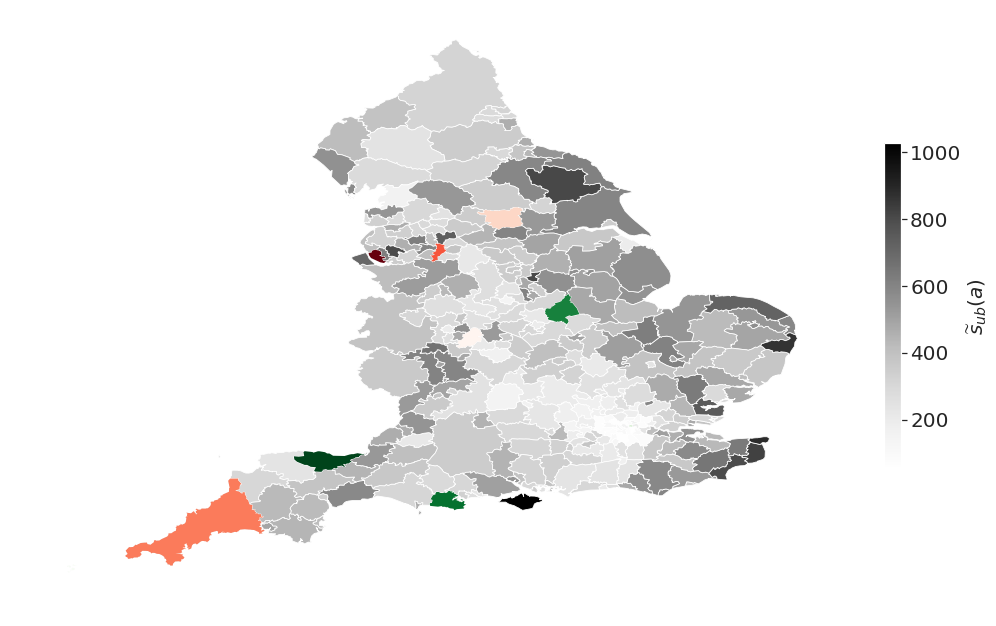

In [60]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Savings_norm'
vmin, vmax = min(savings_opioid_df['Savings_norm']) , max(savings_opioid_df['Savings_norm'])

fig, ax = plt.subplots(1, figsize=(18, 12))
merged.plot(column=variable, cmap='Greys', linewidth=0.8, ax=ax, edgecolor='1')
ax.axis('off')

top.plot(column=variable, cmap='Reds', linewidth=0,alpha=1 , ax=ax, edgecolor='Red')

bottom.plot(column=variable, cmap='Greens', linewidth=0,alpha=1 , ax=ax, edgecolor='Green')

    
# ax.set_title('Overspending for opioids', fontdict={'fontsize': 25, 'fontweight' : 5})
sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm,shrink=0.5)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('$\widetilde s_{ub}(a)$', fontsize = 20)

In [61]:
sorted_dosage = merged.sort_values('Dosage')

top_dosage = sorted_dosage[-5:]
bottom_dosage = sorted_dosage[:5]

In [62]:
top_dosage

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Population,Savings,Seniors,TotalCost,Savings_norm
lad17nm,,,,,,,,,,,,,,,,,,
Bolsover,73,E07000033,None,448666,371548,-1.27228,53.238750,1.610559e+08,82045.369008,POLYGON ((-1.283558389483011 53.30974493114477...,474.661161,102.410054,24.778,76447.0,28043.323384,0.249702,6792.052332,366.833537
Bolton,258,E08000001,None,368352,409873,-2.47952,53.584492,1.384713e+08,65289.603097,POLYGON ((-2.380560670201079 53.63109888437248...,2014.742489,104.792413,28.420,278984.0,173425.495194,0.216077,6335.347735,621.632406
St. Helens,270,E08000013,None,353412,395992,-2.70310,53.458618,1.361435e+08,65623.884896,POLYGON ((-2.731902730333783 53.52083676593957...,1293.590777,113.532999,29.809,176114.0,141470.153612,0.252552,6727.737579,803.287380
Liverpool,269,E08000012,None,339361,390553,-2.91364,53.408298,1.114464e+08,55002.224995,POLYGON ((-2.820171496745364 53.34825641244568...,4202.890623,123.903476,41.126,468397.0,327226.557013,0.194431,5894.505523,698.609421
Knowsley,268,E08000011,None,344762,393778,-2.83297,53.437881,8.627662e+07,58307.123262,POLYGON ((-2.826333518739659 53.48544870106608...,1691.489612,125.160885,41.387,145936.0,90673.380127,0.217616,6542.343408,621.322910


In [63]:
bottom_dosage

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Population,Savings,Seniors,TotalCost,Savings_norm
lad17nm,,,,,,,,,,,,,,,,,,
Lancaster,150,E07000121,None,356896,464988,-2.66030,54.079010,5.734994e+08,161570.894646,POLYGON ((-2.462305518389344 54.22687325169034...,242.845944,18.866134,23.321,139272.0,22471.861218,0.248305,3085.081202,161.352327
Gosport,121,E07000088,None,458773,101094,-1.16725,50.806412,2.617914e+07,27066.577809,POLYGON ((-1.215148624208492 50.80959627548346...,3181.006526,26.020108,20.613,83276.0,29083.820991,0.236311,3293.354463,349.246133
Hart,122,E07000089,None,477985,154240,-0.88321,51.281971,2.145939e+08,66145.775007,POLYGON ((-0.8388686269641593 51.3533883655206...,429.471569,26.093622,5.009,92162.0,30387.446271,0.233448,4074.730940,329.717739
Vale of White Horse,203,E07000180,None,435693,195197,-1.48543,51.654430,5.801736e+08,146430.045486,POLYGON ((-1.304302719829902 51.78142550670687...,211.598735,26.795198,8.457,122764.0,36143.205915,0.248273,2882.122946,294.412091
Daventry,180,E07000151,None,467286,268437,-1.01447,52.309940,6.647483e+08,145859.027709,POLYGON ((-0.9028369618926981 52.4601434305320...,116.045425,27.469807,13.502,77141.0,31039.876755,0.253225,3553.803514,402.378460


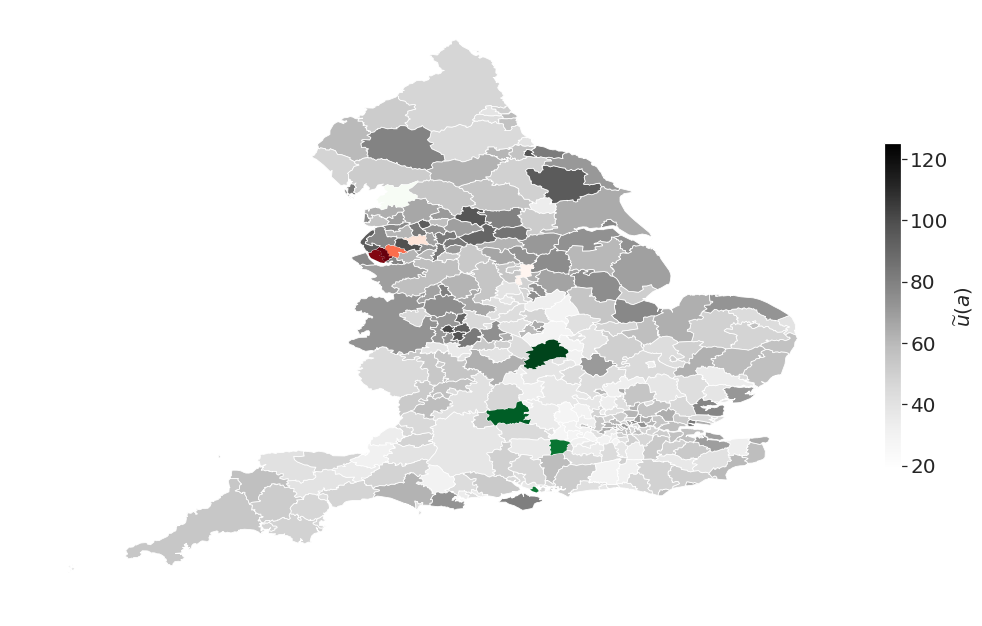

In [64]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Dosage'
vmin, vmax = min(savings_opioid_df['Dosage']) , max(savings_opioid_df['Dosage'])

fig, ax = plt.subplots(1, figsize=(18, 12))
merged.plot(column=variable, cmap='Greys', linewidth=0.8, ax=ax, edgecolor='1')
ax.axis('off')

top_dosage.plot(column=variable, cmap='Reds', linewidth=0,alpha=1 , ax=ax, edgecolor='Red')

bottom_dosage.plot(column=variable, cmap='Greens', linewidth=0,alpha=1 , ax=ax, edgecolor='Green')

# ax.set_title('Normalized dosages per 1000', fontdict={'fontsize': 25, 'fontweight' : 5})
sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm,shrink=0.5)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('$\widetilde u(a)$', fontsize = 20)

In [65]:
savings_opioid_df[savings_opioid_df['Dosage'] == max(savings_opioid_df['Dosage'])]

,Density,Dosage,IMD,Name,Population,Savings,Seniors,TotalCost,Savings_norm,Dosage_total
229,1691.489612,125.160885,41.387,Knowsley,145936,90673.380127,0.217616,6542.343408,621.32291,18265.478953


In [66]:
savings_opioid_df[savings_opioid_df['Savings'] == max(savings_opioid_df['Savings'])]

,Density,Dosage,IMD,Name,Population,Savings,Seniors,TotalCost,Savings_norm,Dosage_total
231,4059.626653,83.005419,37.768,Birmingham,1084841,366421.000652,0.171857,4046.057737,337.764705,90047.681415


In [67]:
standardized_merged = merged.copy()

In [68]:
def normalize(df,feature_names):
    result = df.copy()
    for feature_name in feature_names:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [69]:
standardized_merged = normalize(merged , ['Savings','Density','Dosage','IMD','Seniors'])

In [70]:
standardized_merged.head()

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Population,Savings,Seniors,TotalCost,Savings_norm
lad17nm,,,,,,,,,,,,,,,,,,
Hartlepool,1,E06000001,None,447157,531476,-1.27023,54.676159,9.658682e+07,50245.931523,POLYGON ((-1.243847684350774 54.72307842291248...,0.067302,0.195931,0.761571,92238.0,0.117762,0.502048,8607.415137,469.169228
Middlesbrough,2,E06000002,None,451141,516887,-1.21099,54.544670,5.474167e+07,35458.505804,POLYGON ((-1.200218340036424 54.58300135026919...,0.181541,0.739426,0.951849,138744.0,0.165409,0.399775,9979.994494,437.694893
Redcar and Cleveland,3,E06000003,None,464359,519597,-1.00611,54.567520,2.471405e+08,78666.802657,(POLYGON ((-1.200218311029187 54.5830013303063...,0.037741,0.596905,0.636909,134998.0,0.199441,0.605706,7924.489906,542.175068
Stockton-on-Tees,4,E06000004,None,444937,518183,-1.30669,54.556911,2.064738e+08,86947.340766,POLYGON ((-1.193937249483723 54.62987548771687...,0.065298,0.350570,0.530334,191456.0,0.201746,0.453415,7759.535527,386.704021
Darlington,5,E06000005,None,428029,515649,-1.56835,54.535351,1.982990e+08,91341.118700,POLYGON ((-1.439939711064031 54.59520822980085...,0.036621,0.396514,0.503677,105248.0,0.085037,0.520818,7554.813263,297.284295


In [86]:
corr = pearsonr(standardized_merged['Dosage'], standardized_merged['IMD'])

Text(0.8,0.2,'Corr: 0.57')

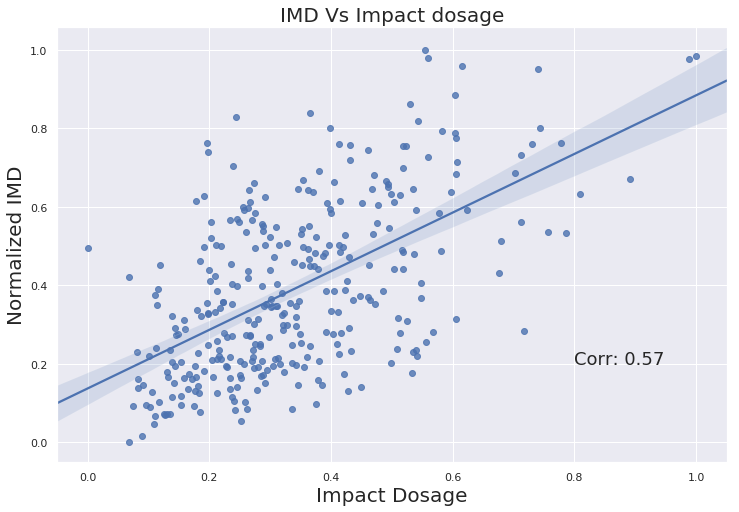

In [87]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Dosage',y='IMD',data=standardized_merged)
ax.set_title("IMD Vs Impact dosage" , fontsize=20)
ax.set_xlabel("Impact Dosage",fontsize=20)
ax.set_ylabel("Normalized IMD",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.2),fontsize = 18)


In [73]:
corr = pearsonr(standardized_merged['Savings'], standardized_merged['IMD'])

Text(0.8,0.2,'Corr: 0.41')

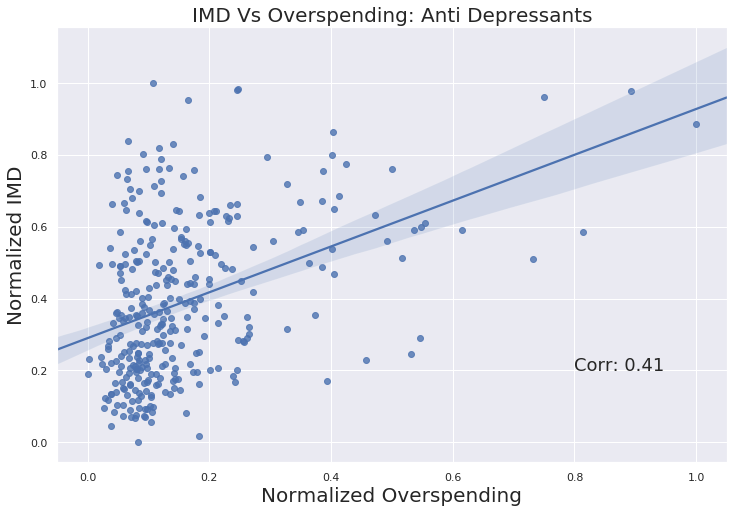

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Savings',y='IMD',data=standardized_merged)
ax.set_title("IMD Vs Overspending: Anti Depressants" , fontsize=20)
ax.set_xlabel("Normalized Overspending",fontsize=20)
ax.set_ylabel("Normalized IMD",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.2),fontsize = 18)


In [75]:
corr = pearsonr(standardized_merged['Savings'], standardized_merged['Seniors'])

Text(0.8,0.2,'Corr: -0.0')

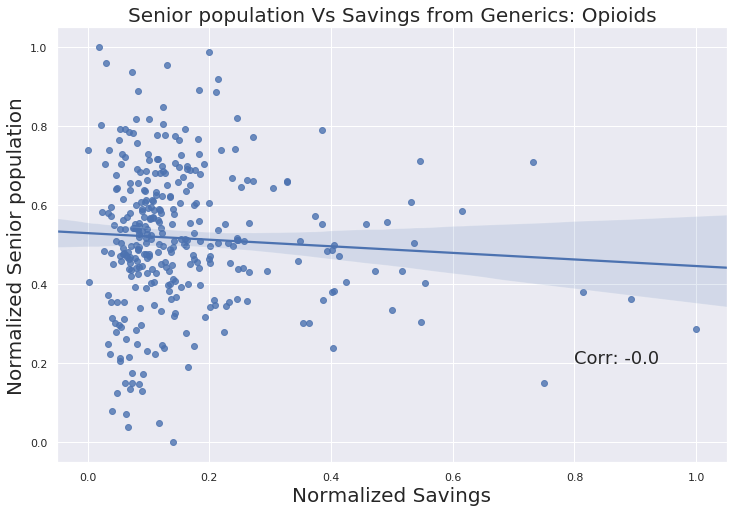

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Savings',y='Seniors',data=standardized_merged)
ax.set_title("Senior population Vs Savings from Generics: Opioids" , fontsize=20)
ax.set_xlabel("Normalized Savings",fontsize=20)
ax.set_ylabel("Normalized Senior population",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.2),fontsize = 18)

In [77]:
corr=pearsonr(standardized_merged['Savings'], standardized_merged['Density'])

Text(0.8,0.8,'Corr: -0.0')

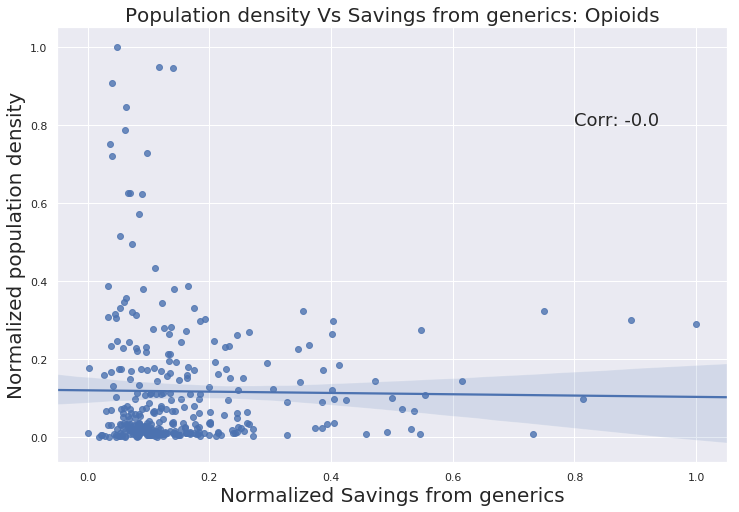

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Savings',y='Density',data=standardized_merged)
ax.set_title("Population density Vs Savings from generics: Opioids" ,fontsize=20)
ax.set_xlabel("Normalized Savings from generics",fontsize=20)
ax.set_ylabel("Normalized population density",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.8),fontsize = 18)

In [79]:
corr=pearsonr(standardized_merged['Dosage'], standardized_merged['Density'])

Text(0.8,0.8,'Corr: 0.12')

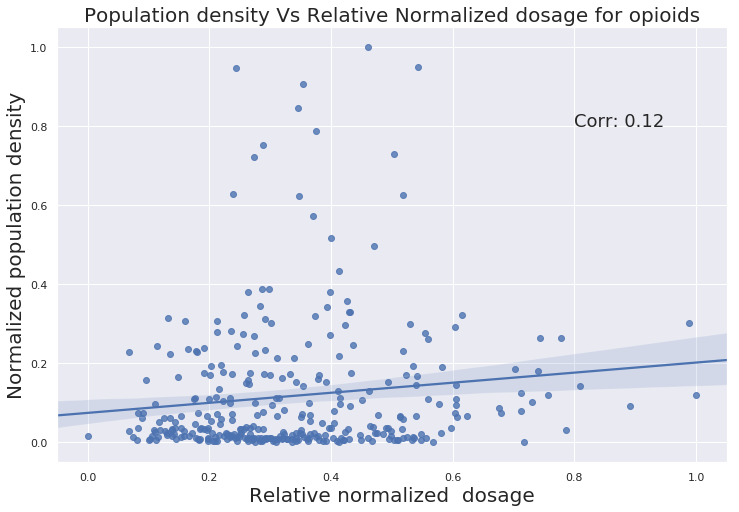

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Dosage',y='Density',data=standardized_merged)
ax.set_title("Population density Vs Relative Normalized dosage for opioids" ,fontsize=20)
ax.set_xlabel("Relative normalized  dosage",fontsize=20)
ax.set_ylabel("Normalized population density",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.8),fontsize = 18)


In [81]:
pearsonr(standardized_merged['Dosage'], standardized_merged['Seniors'])

(-0.04133943823602732, 0.4569648104379179)

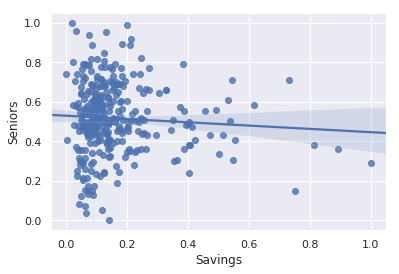

In [82]:
sns.regplot(x='Savings',y='Seniors',data=standardized_merged)

In [83]:
monthlySavings = {}
for k in monthly_borough_savings:
    monthlySavings[k] = np.median(monthly_borough_savings[k].values())
    
    
monthlyCosts = {}
for k in monthly_borough_costs:
    monthlyCosts[k] = np.median(monthly_borough_costs[k].values())